#📄 Importando as Bibliotecas

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracão

In [60]:
url = 'https://github.com/ingridcristh/challenge2-data-science/blob/main/TelecomX_Data.json?raw=true'
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [61]:
len(dados)

7267

In [62]:
dados_normalizado = pd.concat([
	dados[['customerID', 'Churn']],
	pd.json_normalize(dados['customer']),
	pd.json_normalize(dados['phone']),
	pd.json_normalize(dados['internet']),
	pd.json_normalize(dados['account'])
], axis=1)
dados_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [63]:
dados_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [64]:
dados_normalizado['Charges.Total'] = pd.to_numeric(dados_normalizado['Charges.Total'], errors='coerce')

In [65]:
dados_normalizado.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

In [67]:
dados_normalizado['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [102]:
dados_normalizado = dados_normalizado[dados_normalizado['Churn'] != '']


In [104]:
dados_normalizado['Churn'].unique()

array([0, 1], dtype=object)

In [69]:
dados_normalizado['tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [251]:
dados_normalizado[dados_normalizado['PhoneService'] == 0]['InternetService'].unique()

array(['DSL'], dtype=object)

In [252]:
dados_normalizado[dados_normalizado['PhoneService'] == 1]['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [242]:
dados_normalizado[dados_normalizado['InternetService'] != "No"]['PhoneService'].unique()

array([1, 0])

In [254]:
dados_normalizado[dados_normalizado['InternetService'] == "No"]['PhoneService'].unique()

array([1])

In [70]:
dados_normalizado[dados_normalizado['InternetService'] == "No"]['OnlineSecurity'].unique()

array(['No internet service'], dtype=object)

In [71]:
dados_normalizado[dados_normalizado['InternetService'] != "No"]['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
dados_normalizado[dados_normalizado['InternetService'] == "No"]['OnlineBackup'].unique(),dados_normalizado[dados_normalizado['InternetService'] != "No"]['OnlineBackup'].unique()

(array(['No internet service'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [73]:
dados_normalizado[dados_normalizado['InternetService'] == "No"]['DeviceProtection'].unique(),dados_normalizado[dados_normalizado['InternetService'] != "No"]['DeviceProtection'].unique()

(array(['No internet service'], dtype=object),
 array(['No', 'Yes'], dtype=object))

In [74]:
dados_normalizado[dados_normalizado['InternetService'] == "No"]['TechSupport'].unique(),dados_normalizado[dados_normalizado['InternetService'] != "No"]['TechSupport'].unique()

(array(['No internet service'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [75]:
dados_normalizado[dados_normalizado['InternetService'] == "No"]['StreamingTV'].unique(),dados_normalizado[dados_normalizado['InternetService'] != "No"]['StreamingTV'].unique()

(array(['No internet service'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [91]:
dados_normalizado['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [76]:
dados_normalizado[dados_normalizado['InternetService'] == "No"]['StreamingMovies'].unique(),dados_normalizado[dados_normalizado['InternetService'] != "No"]['StreamingMovies'].unique()

(array(['No internet service'], dtype=object),
 array(['No', 'Yes'], dtype=object))

In [77]:
dados_normalizado[dados_normalizado['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [78]:
resultado = dados_normalizado[dados_normalizado['Contract'] == 'One year']['Charges.Total'] / dados_normalizado[dados_normalizado['Contract'] == 'One year']['Charges.Monthly']
resultado

0        9.044207
16      32.542041
18      44.521531
20      51.837302
26      54.549180
          ...    
7249    59.757994
7254    51.823936
7258    47.298999
7259     6.735247
7262    13.470535
Length: 1519, dtype: float64

In [79]:
resultado = dados_normalizado['Charges.Total'].fillna(dados_normalizado['Charges.Total'].mean())
resultado

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7262     742.90
7263    1873.70
7264      92.75
7265    4627.65
7266    3707.60
Name: Charges.Total, Length: 7267, dtype: float64

In [80]:
dados_normalizado['Charges.Total'] = dados_normalizado['Charges.Total'].fillna(dados_normalizado['Charges.Total'].mean())

In [81]:
dados_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [84]:
dados_normalizado['Contas_Diarias'] = round((dados_normalizado['Charges.Monthly'] / 30),2)
dados_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [86]:
dados_normalizado['Churn'] = dados_normalizado['Churn'].replace({'Yes': 1, 'No': 0})

In [87]:
dados_normalizado['Partner'] = dados_normalizado['Partner'].replace({'Yes': 1, 'No': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\3661869621.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizado['Partner'] = dados_normalizado['Partner'].replace({'Yes': 1, 'No': 0})


In [88]:
dados_normalizado['Dependents'] = dados_normalizado['Dependents'].replace({'Yes': 1, 'No': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\1376757761.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizado['Dependents'] = dados_normalizado['Dependents'].replace({'Yes': 1, 'No': 0})


In [89]:
dados_normalizado['PhoneService'] = dados_normalizado['PhoneService'].replace({'Yes': 1, 'No': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\3108609143.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizado['PhoneService'] = dados_normalizado['PhoneService'].replace({'Yes': 1, 'No': 0})


In [90]:
dados_normalizado['PaperlessBilling'] = dados_normalizado['PaperlessBilling'].replace({'Yes': 1, 'No': 0}).astype('int')

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\1219290.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizado['PaperlessBilling'] = dados_normalizado['PaperlessBilling'].replace({'Yes': 1, 'No': 0}).astype('int')


In [96]:
dados_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


In [106]:
dados_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [110]:
dados_normalizado['Churn'] = dados_normalizado['Churn'].astype('int')

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2374240775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizado['Churn'] = dados_normalizado['Churn'].astype('int')


In [111]:
dados_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [218]:
dados2 = dados_normalizado.copy()

In [219]:
dados2['OnlineSecurity'] = dados2['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2813736282.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2['OnlineSecurity'] = dados2['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


In [220]:
dados2['OnlineBackup'] = dados2['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2891986116.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2['OnlineBackup'] = dados2['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


In [221]:
dados2['DeviceProtection'] = dados2['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2324719865.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2['DeviceProtection'] = dados2['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


In [222]:
dados2['TechSupport'] = dados2['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\3138823343.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2['TechSupport'] = dados2['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


In [223]:
dados2['StreamingTV'] = dados2['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2076530504.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2['StreamingTV'] = dados2['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


In [224]:
dados2['StreamingMovies'] = dados2['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2873337314.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2['StreamingMovies'] = dados2['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


In [227]:
dados2['MultipleLines'] = dados2['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2246640596.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2['MultipleLines'] = dados2['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})


In [228]:
dados2['InternetService'] = dados2['InternetService'].replace({'DSL': 1, 'Fiber optic': 2, 'No': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\897408916.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2['InternetService'] = dados2['InternetService'].replace({'DSL': 1, 'Fiber optic': 2, 'No': 0})


In [229]:
dados2['gender'] = dados2['gender'].replace({'Male': 1, 'Female': 0})

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\441804418.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2['gender'] = dados2['gender'].replace({'Male': 1, 'Female': 0})


In [225]:
dados2['TotalServices'] = dados2[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']].sum(axis=1)

In [226]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 
 17  

#📊 Carga e análise

In [112]:
dados_normalizado.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.000,1.00,1.00,1.00
Charges.Monthly,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
Charges.Total,7043.0,2283.296277,2265.000260,18.80,402.225,1400.55,3786.60,8684.80
Contas_Diarias,7043.0,2.158675,1.003088,0.61,1.180,2.34,2.99,3.96


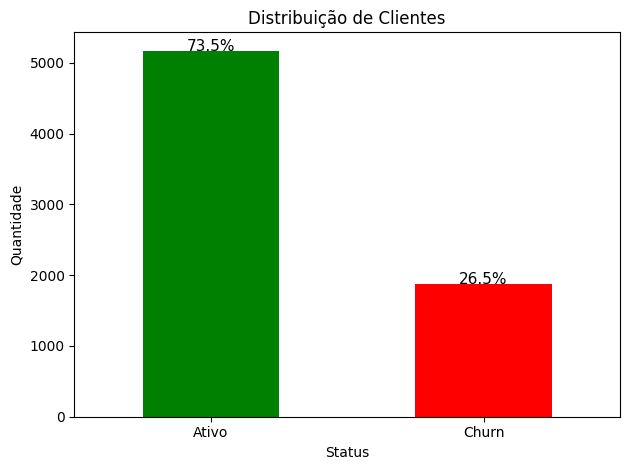

In [120]:
# Contagem de valores 0 e 1 na coluna A
contagem = dados_normalizado['Churn'].value_counts().rename({1: 'Churn', 0: 'Ativo'})

# Geração do gráfico
ax = contagem.plot(kind='bar', color=['green', 'red'])

# Total de linhas (para calcular porcentagem)
total = contagem.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem):
    porcentagem = (valor / total) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Clientes')
plt.ylabel('Quantidade')
plt.xlabel('Status')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [194]:
# Filtrar apenas onde Churn == 0
df_ativo = dados_normalizado[dados_normalizado['Churn'] == 0]
df_ativo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,2.00
5,0013-MHZWF,0,Female,0,0,1,9,1,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,1,Credit card (automatic),69.40,571.45,2.31
6,0013-SMEOE,0,Female,1,1,0,71,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),109.70,7904.25,3.66
7,0014-BMAQU,0,Male,0,1,0,63,1,Yes,Fiber optic,...,No,Yes,No,No,Two year,1,Credit card (automatic),84.65,5377.80,2.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,9979-RGMZT,0,Female,0,0,0,7,1,No,Fiber optic,...,No,No,Yes,Yes,One year,1,Mailed check,94.05,633.45,3.14
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


In [121]:
# Filtrar apenas onde Churn == 1
df_churn = dados_normalizado[dados_normalizado['Churn'] == 1]
df_churn

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.80
18,0022-TCJCI,1,Male,1,0,0,45,1,No,DSL,...,Yes,No,No,Yes,One year,0,Credit card (automatic),62.70,2791.50,2.09
19,0023-HGHWL,1,Male,1,0,0,1,0,No phone service,DSL,...,No,No,No,No,Month-to-month,1,Electronic check,25.10,25.10,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,1,Male,1,0,0,21,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic),96.80,2030.30,3.23
7246,9965-YOKZB,1,Male,1,0,0,9,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,83.85,790.15,2.80
7260,9985-MWVIX,1,Female,0,0,0,1,1,No,Fiber optic,...,No,No,No,No,Month-to-month,1,Mailed check,70.15,70.15,2.34
7261,9986-BONCE,1,Female,0,0,0,4,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Bank transfer (automatic),20.95,85.50,0.70


In [188]:
df_churn['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df_churn['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df_churn['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df_churn['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\104053355.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_churn['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_8536\104053355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['OnlineSecurity'].

In [189]:
df_churn['TotalServices'] = df_churn[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']].sum(axis=1)
df_churn

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2609745636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['TotalServices'] = df_churn[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']].sum(axis=1)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,TotalServices,Faixa_Charges_Total
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,No,Month-to-month,1,Electronic check,73.90,100-250,2.46,1,250-500
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,Month-to-month,1,Electronic check,98.00,750-1000,3.27,2,1000-1500
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,Yes,No,Month-to-month,1,Mailed check,83.90,100-250,2.80,1,250-500
18,0022-TCJCI,1,Male,1,0,0,45,1,No,DSL,...,No,Yes,One year,0,Credit card (automatic),62.70,1500-2000,2.09,2,2000-3000
19,0023-HGHWL,1,Male,1,0,0,1,0,No phone service,DSL,...,No,No,Month-to-month,1,Electronic check,25.10,NaN,0.84,0,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,1,Male,1,0,0,21,1,No,Fiber optic,...,Yes,Yes,Month-to-month,1,Bank transfer (automatic),96.80,1500-2000,3.23,1,2000-3000
7246,9965-YOKZB,1,Male,1,0,0,9,1,Yes,Fiber optic,...,No,Yes,Month-to-month,1,Electronic check,83.85,500-750,2.80,0,750-1000
7260,9985-MWVIX,1,Female,0,0,0,1,1,No,Fiber optic,...,No,No,Month-to-month,1,Mailed check,70.15,NaN,2.34,0,0-100
7261,9986-BONCE,1,Female,0,0,0,4,1,No,No,...,No internet service,No internet service,Month-to-month,0,Bank transfer (automatic),20.95,NaN,0.70,0,0-100


In [175]:
df_churn2 = dados_normalizado.copy()

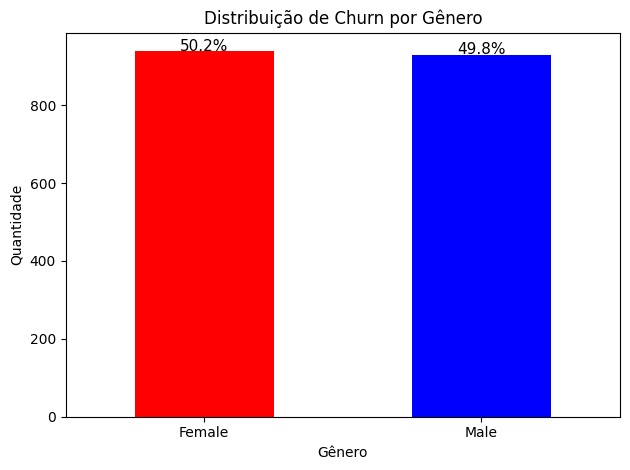

In [131]:
# Contagem de valores 0 e 1 na coluna A
contagem_genero = df_churn['gender'].value_counts()


# Geração do gráfico
ax = contagem_genero.plot(kind='bar', color=['red', 'blue'])

# Total de linhas (para calcular porcentagem)
total_genero = contagem_genero.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_genero):
    porcentagem = (valor / total_genero) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Gênero')
plt.ylabel('Quantidade')
plt.xlabel('Gênero')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

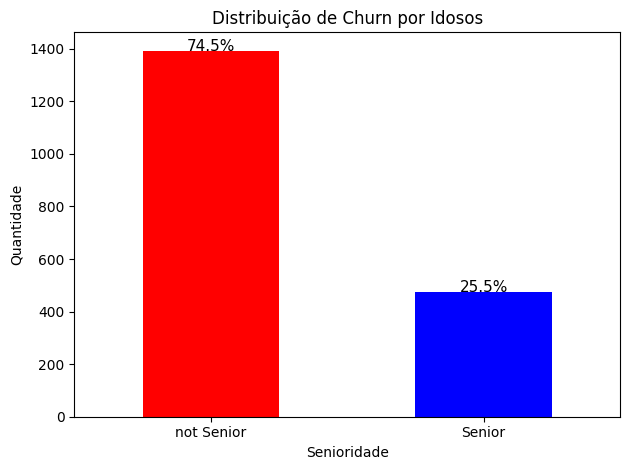

In [255]:
# Contagem de valores 
contagem_senior = df_churn['SeniorCitizen'].value_counts().rename({1: 'Senior', 0: 'not Senior'})

# Geração do gráfico
ax = contagem_senior.plot(kind='bar', color=['red', 'blue'])

# Total de linhas (para calcular porcentagem)
total_senior = contagem_senior.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_senior):
    porcentagem = (valor / total_senior) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Idosos')
plt.ylabel('Quantidade')
plt.xlabel('Senioridade')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

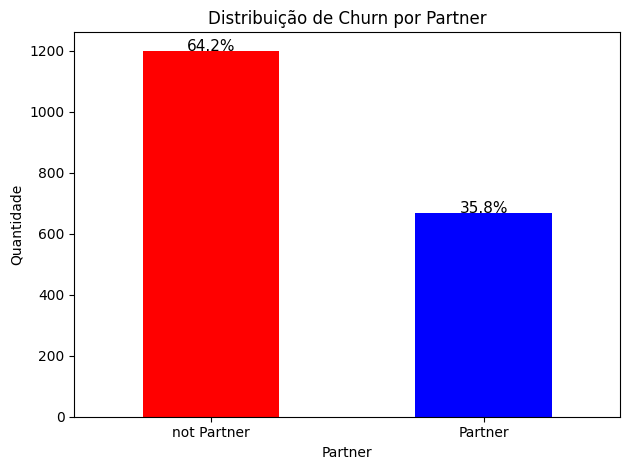

In [133]:
# Contagem de valores 
contagem_partner = df_churn['Partner'].value_counts().rename({1: 'Partner', 0: 'not Partner'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Partner')
plt.ylabel('Quantidade')
plt.xlabel('Partner')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

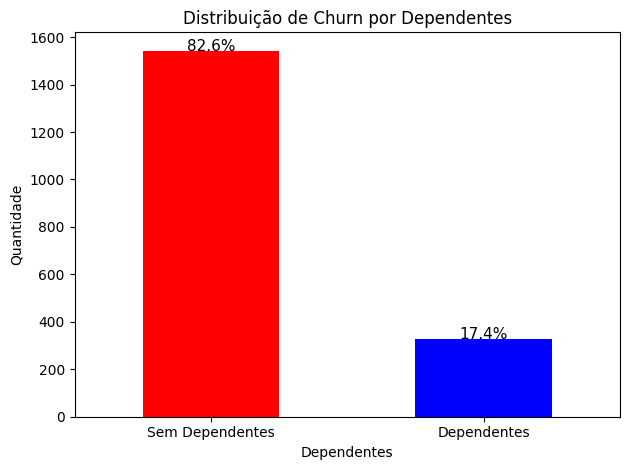

In [134]:
# Contagem de valores 
contagem_partner = df_churn['Dependents'].value_counts().rename({1: 'Dependentes', 0: 'Sem Dependentes'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Dependentes')
plt.ylabel('Quantidade')
plt.xlabel('Dependentes')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

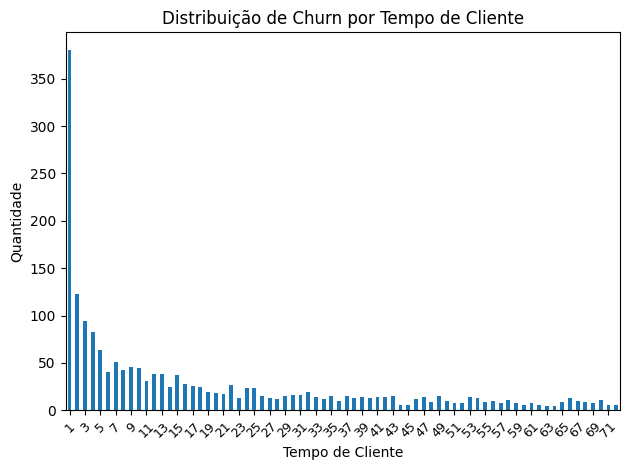

In [299]:
# Contagem de valores 
contagem_tempochurn = df_churn['tenure'].value_counts().sort_index()

# Geração do gráfico
ax = contagem_tempochurn.plot(kind='bar')

# Total de linhas (para calcular porcentagem)
total_tempochurn = contagem_tempochurn.sum()

# Personalizando o gráfico
plt.title('Distribuição de Churn por Tempo de Cliente')
plt.ylabel('Quantidade')
plt.xlabel('Tempo de Cliente')
plt.xticks(rotation=45, fontsize=9)
ax.set_xticks(ax.get_xticks()[::2])  # Exibe 1 a cada 2
plt.tight_layout()

plt.show()

In [305]:
contagem_tempochurn.head()

tenure
1    380
2    123
3     94
4     83
5     64
Name: count, dtype: int64

In [321]:
df_tempochurn = contagem_tempochurn.to_frame().reset_index()
df_tempochurn = df_tempochurn.apply(pd.to_numeric, errors='coerce')
df_tempochurn.columns

Index(['tenure', 'count'], dtype='object')

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\3782041955.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado = df_tempochurn.groupby('faixa_tenure')['count'].sum()


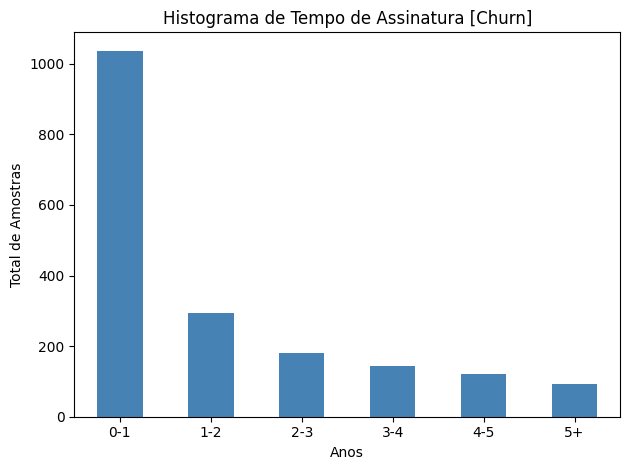

In [325]:
# Definir os bins e os rótulos
bins = [0, 12, 24, 36, 48, 60, float('inf')]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

# Criar a faixa de tenure na tabela correta
df_tempochurn['faixa_tenure'] = pd.cut(df_tempochurn['tenure'], bins=bins, labels=labels, include_lowest=True, right=True)

# Agrupar por faixa e somar os 
# counts
agrupado = df_tempochurn.groupby('faixa_tenure')['count'].sum()

# Gerar gráfico de barras (histograma agregado)
agrupado.plot(kind='bar', color='steelblue')

# Personalizar gráfico
plt.title('Histograma de Tempo de Assinatura [Churn]')
plt.xlabel('Anos')
plt.ylabel('Total de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

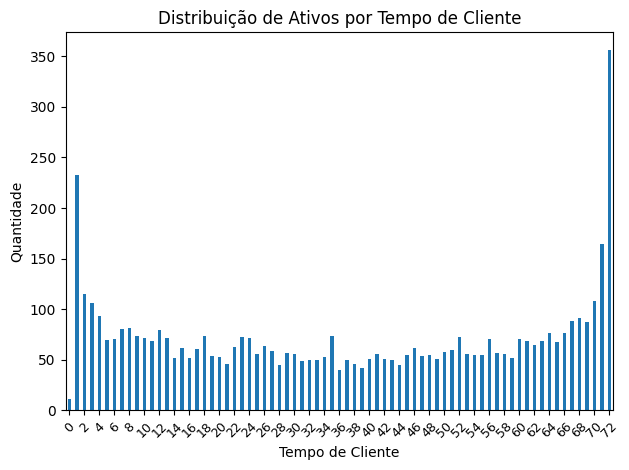

In [323]:
# Contagem de valores 
contagem_tempoativo = df_ativo['tenure'].value_counts().sort_index()


# Geração do gráfico
ax = contagem_tempoativo.plot(kind='bar')

# Total de linhas (para calcular porcentagem)
total_tempoativo = contagem_tempoativo.sum()

# Personalizando o gráfico
plt.title('Distribuição de Ativos por Tempo de Cliente')
plt.ylabel('Quantidade')
plt.xlabel('Tempo de Cliente')
plt.xticks(rotation=45, fontsize=9)
ax.set_xticks(ax.get_xticks()[::2])  # Exibe 1 a cada 2
plt.tight_layout()

plt.show()

In [324]:
df_tempoativo = contagem_tempoativo.to_frame().reset_index()
df_tempoativo = df_tempoativo.apply(pd.to_numeric, errors='coerce')
df_tempoativo.columns

Index(['tenure', 'count'], dtype='object')

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2966558043.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado = df_tempoativo.groupby('faixa_tenure')['count'].sum()


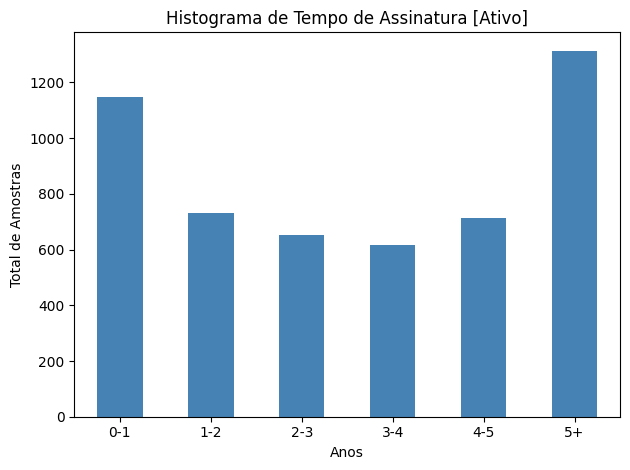

In [326]:
# Definir os bins e os rótulos
bins = [0, 12, 24, 36, 48, 60, float('inf')]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

# Criar a faixa de tenure na tabela correta
df_tempoativo['faixa_tenure'] = pd.cut(df_tempoativo['tenure'], bins=bins, labels=labels, include_lowest=True, right=True)

# Agrupar por faixa e somar os 
# counts
agrupado = df_tempoativo.groupby('faixa_tenure')['count'].sum()

# Gerar gráfico de barras (histograma agregado)
agrupado.plot(kind='bar', color='steelblue')

# Personalizar gráfico
plt.title('Histograma de Tempo de Assinatura [Ativo]')
plt.xlabel('Anos')
plt.ylabel('Total de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [336]:
df_tempoativo2 = df_tempoativo.groupby('faixa_tenure')['count'].sum().reset_index()
df_tempochurn2 = df_tempochurn.groupby('faixa_tenure')['count'].sum().reset_index()

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\3179991069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tempoativo2 = df_tempoativo.groupby('faixa_tenure')['count'].sum().reset_index()
C:\Users\silve\AppData\Local\Temp\ipykernel_8536\3179991069.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tempochurn2 = df_tempochurn.groupby('faixa_tenure')['count'].sum().reset_index()


In [337]:
df_tempo = pd.merge(df_tempoativo2, df_tempochurn2, on=['faixa_tenure'])
df_tempo.head()

,faixa_tenure,count_x,count_y
0,0-1,1149,1037.0
1,1-2,730,294.0
2,2-3,652,180.0
3,3-4,617,145.0
4,4-5,712,120.0


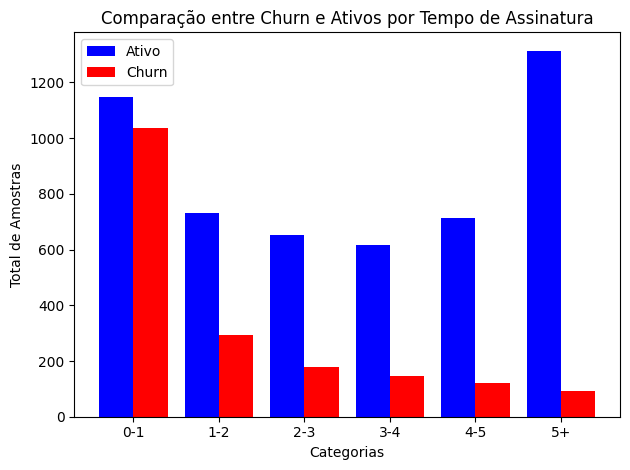

In [342]:
# Definir os bins e os rótulos
bins = [0, 12, 24, 36, 48, 60, float('inf')]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

# Posição das barras no eixo X
posicao = range(len(df_tempo))

# Criando o gráfico
plt.bar(posicao, df_tempo['count_x'], width=0.4, label='Ativo', align='center', color=['blue'])
plt.bar([p + 0.4 for p in posicao], df_tempo['count_y'], width=0.4, label='Churn', align='center', color=['red'])

# Configurando os rótulos do eixo X
plt.xticks([p + 0.2 for p in posicao], df_tempo['faixa_tenure'])

# Personalização
plt.title('Comparação entre Churn e Ativos por Tempo de Assinatura')
plt.xlabel('Categorias')
plt.ylabel('Total de Amostras')
plt.legend()
plt.tight_layout()
plt.show()

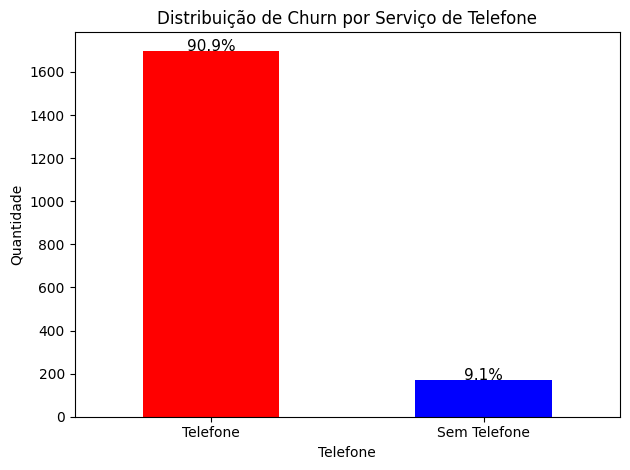

In [ ]:
# Contagem de valores 
contagem_partner = df_churn['PhoneService'].value_counts().rename({1: 'Telefone', 0: 'Sem Telefone'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Serviço de Telefone')
plt.ylabel('Quantidade')
plt.xlabel('Telefone')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

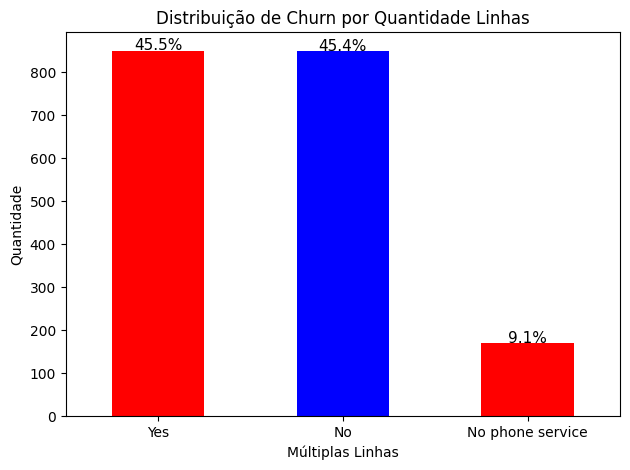

In [147]:
# Contagem de valores 
contagem_partner = df_churn['MultipleLines'].value_counts().rename({1: 'Múltiplas Linhas', 0: 'Linha Única'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Quantidade Linhas')
plt.ylabel('Quantidade')
plt.xlabel('Múltiplas Linhas')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

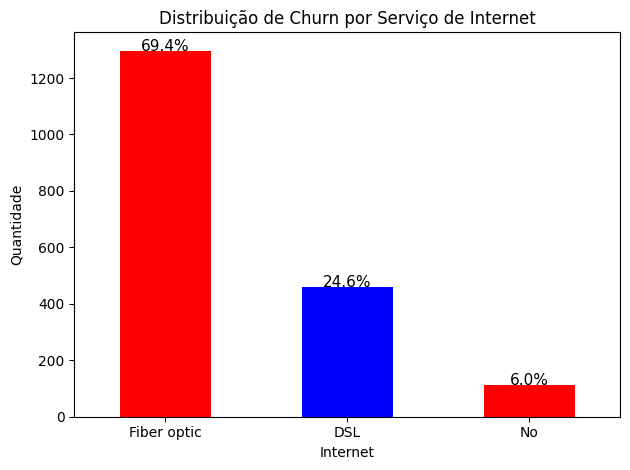

In [148]:
# Contagem de valores 
contagem_partner = df_churn['InternetService'].value_counts().rename({1: 'Internet', 0: 'Sem Internet'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Serviço de Internet')
plt.ylabel('Quantidade')
plt.xlabel('Internet')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

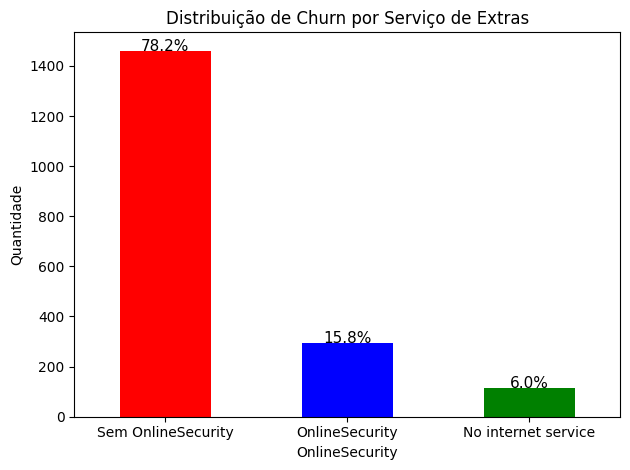

In [ ]:
# Contagem de valores 
contagem_partner = df_churn['OnlineSecurity'].value_counts().rename({'Yes': 'OnlineSecurity', 'No': 'Sem OnlineSecurity'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue','green'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Serviço de Extras')
plt.ylabel('Quantidade')
plt.xlabel('Online Security')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

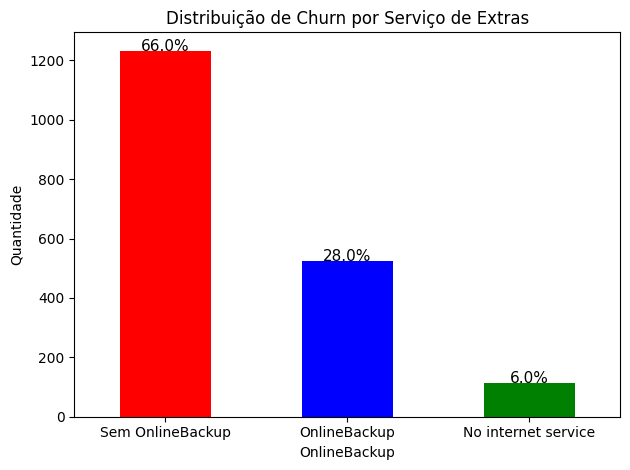

In [ ]:
# Contagem de valores 
contagem_partner = df_churn['OnlineBackup'].value_counts().rename({'Yes': 'OnlineBackup', 'No': 'Sem OnlineBackup'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue','green'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Serviço de Extras')
plt.ylabel('Quantidade')
plt.xlabel('Online Backup')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

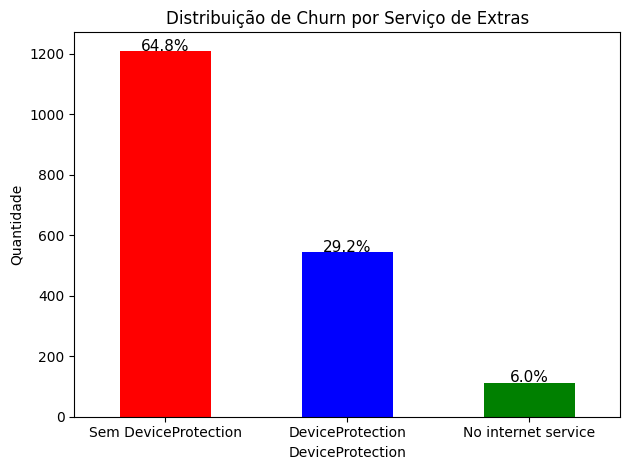

In [ ]:
# Contagem de valores 
contagem_partner = df_churn['DeviceProtection'].value_counts().rename({'Yes': 'DeviceProtection', 'No': 'Sem DeviceProtection'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue','green'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Serviço de Extras')
plt.ylabel('Quantidade')
plt.xlabel('Device Protection')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

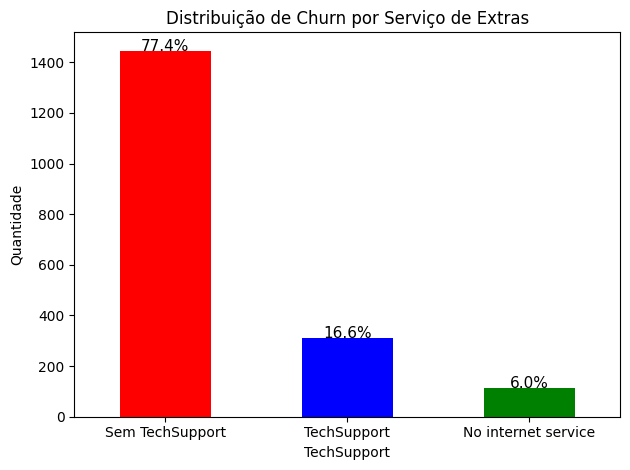

In [ ]:
# Contagem de valores 
contagem_partner = df_churn['TechSupport'].value_counts().rename({'Yes': 'TechSupport', 'No': 'Sem TechSupport'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue','green'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Serviço de Extras')
plt.ylabel('Quantidade')
plt.xlabel('Tech Support')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

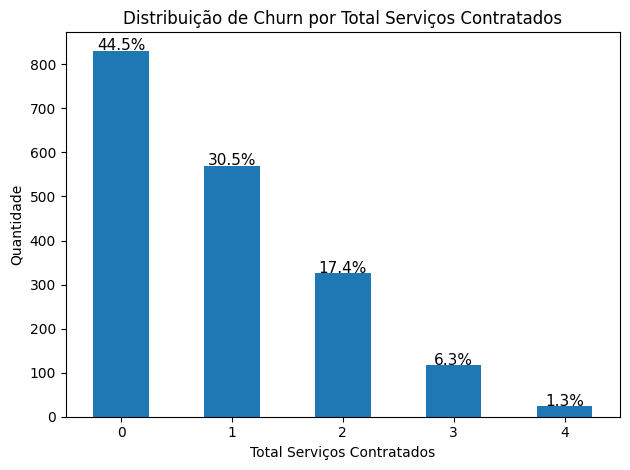

In [165]:
# Contagem de valores 
contagem_partner = df_churn['TotalServices'].value_counts()

# Geração do gráfico
ax = contagem_partner.plot(kind='bar')

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Total Serviços Contratados')
plt.ylabel('Quantidade')
plt.xlabel('Total Serviços Contratados')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

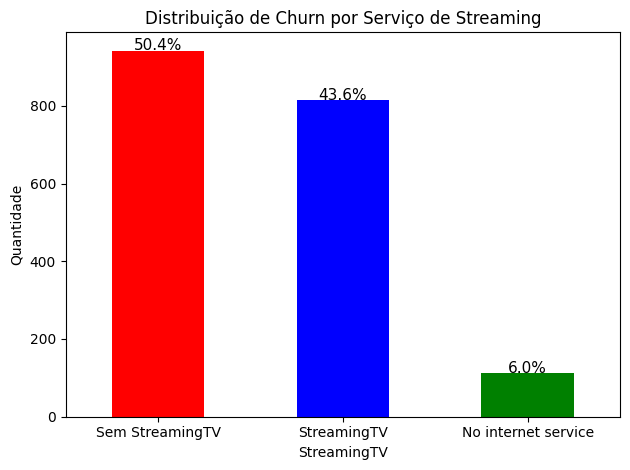

In [ ]:
# Contagem de valores 
contagem_partner = df_churn['StreamingTV'].value_counts().rename({'Yes': 'StreamingTV', 'No': 'Sem StreamingTV'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue','green'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Serviço de Streaming')
plt.ylabel('Quantidade')
plt.xlabel('Streaming TV')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

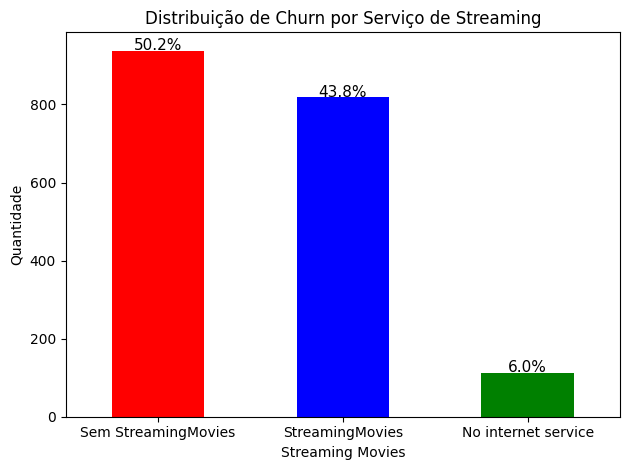

In [157]:
# Contagem de valores 
contagem_partner = df_churn['StreamingMovies'].value_counts().rename({'Yes': 'StreamingMovies', 'No': 'Sem StreamingMovies'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue','green'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Serviço de Streaming')
plt.ylabel('Quantidade')
plt.xlabel('Streaming Movies')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

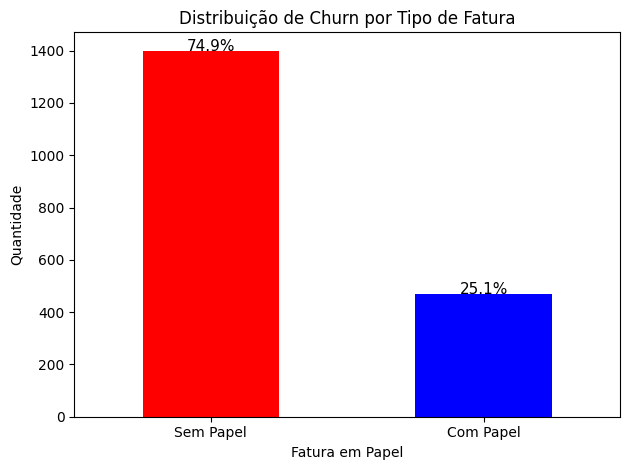

In [260]:
# Contagem de valores 
contagem_partner = df_churn['PaperlessBilling'].value_counts().rename({1: 'Sem Papel', 0: 'Com Papel'})

# Geração do gráfico
ax = contagem_partner.plot(kind='bar', color=['red', 'blue','green'])

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Tipo de Fatura')
plt.ylabel('Quantidade')
plt.xlabel('Fatura em Papel')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

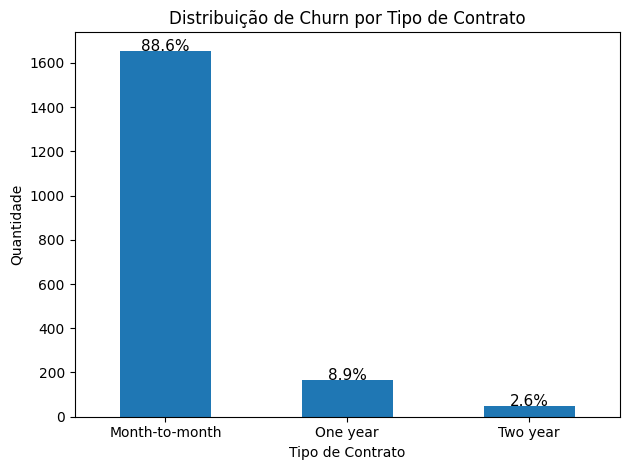

In [158]:
# Contagem de valores 
contagem_partner = df_churn['Contract'].value_counts()

# Geração do gráfico
ax = contagem_partner.plot(kind='bar')

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.ylabel('Quantidade')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

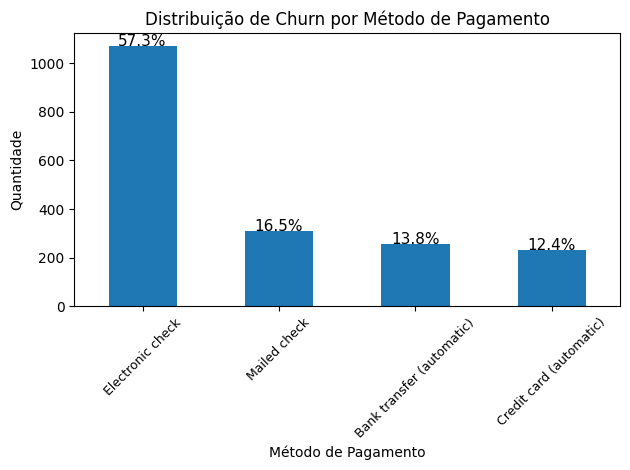

In [160]:
# Contagem de valores 
contagem_partner = df_churn['PaymentMethod'].value_counts()

# Geração do gráfico
ax = contagem_partner.plot(kind='bar')

# Total de linhas (para calcular porcentagem)
total_partner = contagem_partner.sum()

# Adicionar porcentagens nas barras
for i, valor in enumerate(contagem_partner):
    porcentagem = (valor / total_partner) * 100
    ax.text(i, valor + 0.4, f'{porcentagem:.1f}%', ha='center', fontsize=11)

# Personalizando o gráfico
plt.title('Distribuição de Churn por Método de Pagamento')
plt.ylabel('Quantidade')
plt.xlabel('Método de Pagamento')
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()

plt.show()

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\325820968.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela = df_churn2.groupby(['Faixa_Charges_Total', 'Churn']).size().unstack(fill_value=0)


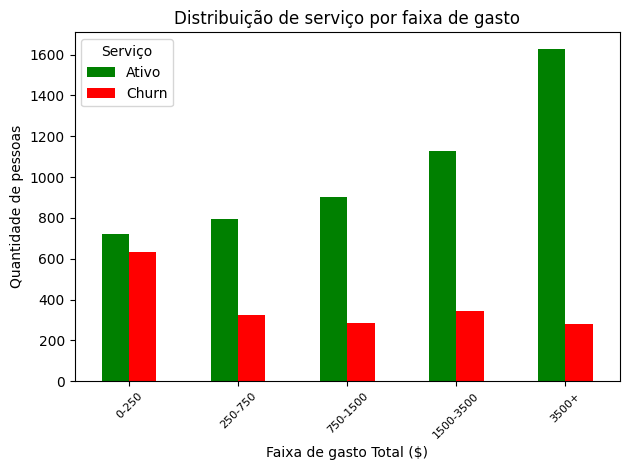

In [284]:
# Corrigir faixas de gasto (bins) e labels
bins = [0, 250, 750, 1500, 3500, 100000]
labels = ['0-250', '250-750', '750-1500', '1500-3500', '3500+']

# Usar a coluna numérica original para binning
df_churn2['Faixa_Charges_Total'] = pd.cut(df_churn2['Charges.Total'], bins=bins, labels=labels, include_lowest=True)

# Contar quantidade de pessoas com/sem serviço por faixa
tabela = df_churn2.groupby(['Faixa_Charges_Total', 'Churn']).size().unstack(fill_value=0)

# Gerar o histograma agrupado
tabela.plot(kind='bar', stacked=False, color={0: 'green', 1: 'red'})

# Personalizar gráfico
plt.title('Distribuição de serviço por faixa de gasto')
plt.xlabel('Faixa de gasto Total ($)')
plt.ylabel('Quantidade de pessoas')
plt.legend(title='Serviço', labels=['Ativo', 'Churn'])
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\3813262462.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela = df_churn2.groupby(['Faixa_Charges_Diarias', 'Churn']).size().unstack(fill_value=0)


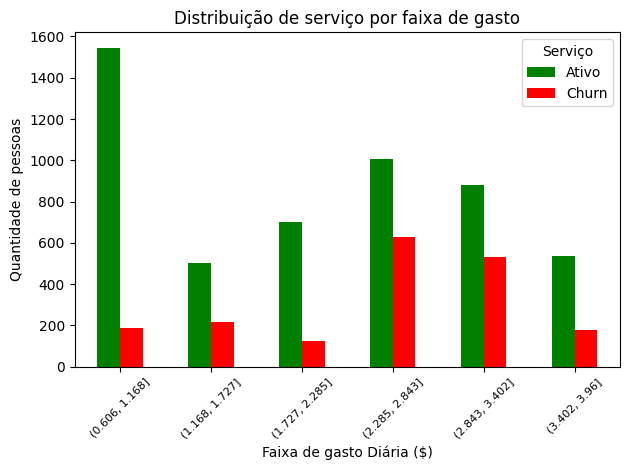

In [282]:
# Usar a coluna numérica original para binning
df_churn2['Faixa_Charges_Diarias'] = pd.cut(df_churn2['Contas_Diarias'], bins=6, include_lowest=True)

# Contar quantidade de pessoas com/sem serviço por faixa
tabela = df_churn2.groupby(['Faixa_Charges_Diarias', 'Churn']).size().unstack(fill_value=0)

# Gerar o histograma agrupado
tabela.plot(kind='bar', stacked=False, color={0: 'green', 1: 'red'})

# Personalizar gráfico
plt.title('Distribuição de serviço por faixa de gasto')
plt.xlabel('Faixa de gasto Diária ($)')
plt.ylabel('Quantidade de pessoas')
plt.legend(title='Serviço', labels=['Ativo', 'Churn'])
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

C:\Users\silve\AppData\Local\Temp\ipykernel_8536\2497458854.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela = df_churn2.groupby(['Faixa_Charges_Diarias_2', 'Churn']).size().unstack(fill_value=0)


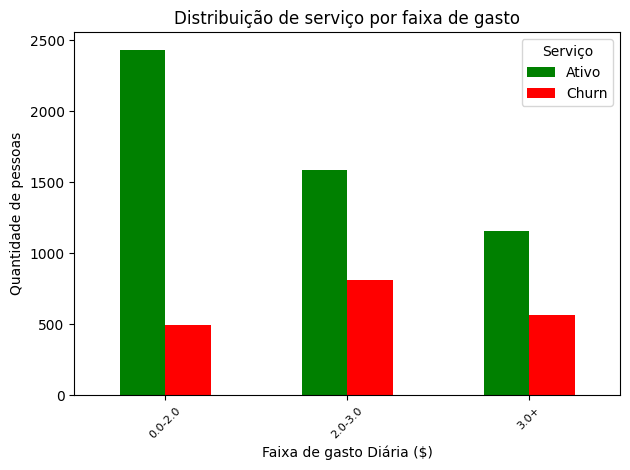

In [283]:
# Corrigir faixas de gasto (bins) e labels
bins = [0, 2.0, 3.0, 10.0]
labels = ['0.0-2.0', '2.0-3.0', '3.0+']

# Usar a coluna numérica original para binning
df_churn2['Faixa_Charges_Diarias_2'] = pd.cut(df_churn2['Contas_Diarias'], bins=bins, labels=labels, include_lowest=True)

# Contar quantidade de pessoas com/sem serviço por faixa
tabela = df_churn2.groupby(['Faixa_Charges_Diarias_2', 'Churn']).size().unstack(fill_value=0)

# Gerar o histograma agrupado
tabela.plot(kind='bar', stacked=False, color={0: 'green', 1: 'red'})

# Personalizar gráfico
plt.title('Distribuição de serviço por faixa de gasto')
plt.xlabel('Faixa de gasto Diária ($)')
plt.ylabel('Quantidade de pessoas')
plt.legend(title='Serviço', labels=['Ativo', 'Churn'])
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

### EXTRA

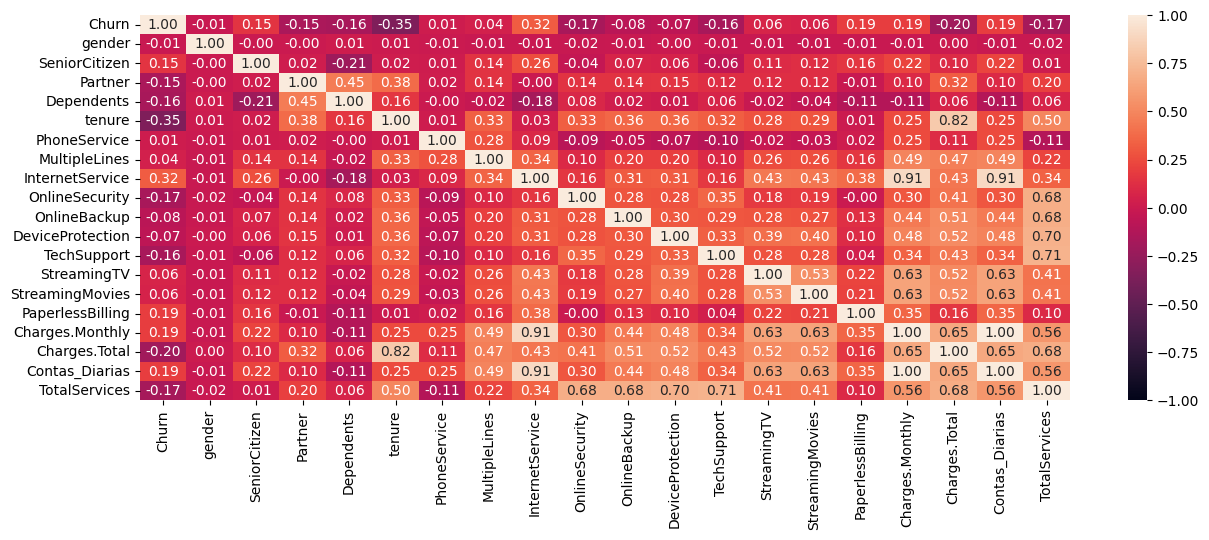

In [231]:
# Matriz Correlação
plt.figure(figsize=(15,5))
numeric_cols = dados2.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f');

In [238]:
correlacao = dados2[['Churn', 'TotalServices']].corr()
correlacao


,Churn,TotalServices
Churn,1.000000,-0.173061
TotalServices,-0.173061,1.000000


#📄Relatorio Final

<h3><b> 1.0 Introdução </b></h3>

<p>Temos a base de dados de clientes de uma operadora com várias informações como:<br>
<br>Todos os serviços extras oferecidos:
<li>Online Security</li>
<li>Online Backup</li>
<li>Device Protection</li>
<li>Tech Support</li>
<br>O tipo de serviço contratado:<br> 
<li>Phone</li>
<li>Internet</li>
<li>Multiple Lines</li>
<br>Se o cliente tem contratado serviços adicionais:<br>
<li>Streaming TV</li>
<li>Streaming Movie</li>
<br>Há as características de pagamentos:
<li>Conta em papel </li>
<li>Forma de pagamento - automático ou manual</li>
<br>Por fim, temos algumas características pessoais do cliente:<br>
<li>Dependentes</li>
<li>Casado</li>
<li>Sexo</li>
<li>Idoso</li>
<br>De posse do status do cliente - Ativo ou <b>Churn</b> (não é mais cliente), iremos realizar um estudo para encontrar se há alguma destas características que mostram que aumentam as chances do cliente continuar ativo ou do cliente cancelar a assinatura</p>


<h3><b> 2.0 Limpeza e Tratamento de Dados </b></h3>

<h4> 2.1 Importação </h4>

Trata-se de uma base de dados em formato json. Ela possui possui uma estrutura aninhada em até 3 níveis. Para isso utilizamos a função json_normalize para termos um dataframe em um único nível.

<h4> 2.2 Limpeza </h4>

<p>Quanto a consistência dos dados, não foram encontrados problemas no preenchimento. <br>
Foram eliminados os dados em que a informação de Churn estava vazia (~3%)<br>
Foi feita a conversão do campo Charges.Total para numérico.</p>

<h4> 2.3 Tratamento </h4>

 <p>Alguns tratamentos foram necessários:<br>
 - Preencher com a média os valores de Charges.Total vazios<br>
 - Transformar vários campos categóricos em numéricos<br>
 - Criada a coluna Contas.Diárias: Dividir Charges.Monthly por 30<br>
 - Criada a coluna TotalService, somando todos os serviços extras (total de 4) adquiridos pelos clientes.</p>

<h3><b> 3.0 Análise Exploratória de Dados </b></h3>

Apresente as análises feitas, incluindo gráficos e visualizações para identificar padrões.

<p>Um resumo dos tipos de clientes existentes mostram que podemos dividir em 3 grandes grupos:<br>
- Somente serviço de telefone <br>
- Serviço de telefone e internet (Fibra ou DSL)<br>
- Somente serviço de internet (DSL)<br>
<br>A primeira análise feita foi sobre o percentual de clientes ativos (76%) e clientes que cancelaram os serviços (24%):<br>
<br><div style="text-align: center;"><img src="images/churn.png" width=500></div><br>
Considerando somente o grupo de registro de evasão (churn == 1), podemos fazer mais algumas análises:<br>
<br><li>Quanto as características pessoais:</li>
<ol>Relevantes: Dependentes - 82% de quem cancelou o serviço não tem dependentes.<br>
<br><div style="text-align: center;"><img src="images/pessoalDependentes.png" width=500></div><br></ol>
<ol>Baixa Relevância: O fato de ter parceiros ou ser idoso (neste caso, segue a proporção dos clientes no geral), apesar de apresentar uma diferença, ela não é muito impactante.<br>
<br><div style="text-align: center;"><img src="images/pessoalPartner.png" width=500><img src="images/pessoalSenior.png" width=500></div><br></ol>
<ol>Sem Relevância: Gênero - mesmo percentual de cancelamento para homens e mulheres.<br>
<br><div style="text-align: center;"><img src="images/pessoalPartner.png" width=500></div><br></ol>
<br><li>Quanto aos Serviços contratados:</li>
<ol>Relevantes: Internet - 69% de quem cancelou o serviço contratou internet por fibra ótica.<br>
<br><div style="text-align: center;"><img src="images/servicoInternet.png" width=500></div><br></ol>
<ol>Baixa Relevância: Telefone - apenas espelha a mesma proporção de clientes no geral.<br>
<br><div style="text-align: center;"><img src="images/servicoTelefone.png" width=500></div><br></ol>
<ol>Sem Relevância: Múltiplas Linhas - mesmo percentual se tem mais de uma linha ou não.<br>
<br><div style="text-align: center;"><img src="images/servicoMultipleLines.png" width=500></div><br></ol>
<br><li>Quanto aos Serviços extras contratados:</li>
<ol>Relevantes: Total de Serviços extra contratados - 75% de quem cancelou o serviço contratou um serviço apenas ou nenhum.<br>
<br><div style="text-align: center;"><img src="images/extraMultiplos.png" width=500></div><br></ol>
Não ter Online Security e Tech Support são os que possuem maior relevância isoladamente (~80%)<br>
<br><div style="text-align: center;"><img src="images/extraOnlineSecurity.png" width=500><img src="images/extraTechSupport.png" width=500></div><br></ol>
<ol>Menor Relevância: Online Backup e Device Protection também tem relevância isoladamente mas em menor proporção (~65%).<br>
<br><div style="text-align: center;"><img src="images/extraOnlineBackup.png" width=500><img src="images/extraDeviceProtection.png" width=500></div><br></ol>
<br><li>Quanto aos Serviços de Streaming:</li>
<ol>Sem Relevância: Ter ou não Streaming de TV ou de Filmes tem o mesmo peso.<br>
<br><div style="text-align: center;"><img src="images/streamingTV.png" width=500><img src="images/streamingMovies.png" width=500></div><br></ol>
<br><li>Quanto a fatura:</li>
<ol>Relevantes: Todas as informações são relevantes.<br><br>
A fatura era sem papel para 75% de quem cancelou.<br>
<br><div style="text-align: center;"><img src="images/faturaPapel.png" width=500></div><br></ol>
O pagamento era mensal para 88% de quem cancelou.<br>
<br><div style="text-align: center;"><img src="images/faturaPeriodo.png" width=500></div><br></ol>
O pagamento era manual para 74% de quem cancelou.<br>
<br><div style="text-align: center;"><img src="images/faturaMetodo.png" width=500></div><br></ol>
<br><li>Quanto aos Gastos:</li>
<ol>Os clientes que permanecem ativos tem um gasto total maior<br><br>
<br><div style="text-align: center;"><img src="images/gastoTotal.png" width=500></div><br></ol>
O gasto diário mostra uma informação muito relevante: A maioria dos clientes ativos tem um gasto diário de até 2 e a maioria dos cancelamentos são de clientes com gastos diários acima de 2.<br>
<br><div style="text-align: center;"><img src="images/gastoDiario2.png" width=500></div><br></ol>
<br><li>Quanto ao Tempo:</li>
<ol>A maior parte dos clientes cancela no primeiro ano de contrato ou até o terceiro ano.<br><br>
<br><div style="text-align: center;"><img src="images/tempoChurn2.png" width=500></div><br></ol>
Grande parte dos clientes estão localizados nas duas extremidades: possuem até 1 ano e 5 anos ou mais de contrato.<br>
<br><div style="text-align: center;"><img src="images/tempoAtivo2.png" width=500></div><br></ol>
Tudo fica mais claro lado a lado.<br>
<br><div style="text-align: center;"><img src="images/tempoChurnxAtivo.png" width=500></div><br></ol>
Por fim, a tabela de correlações, que mostra que o tempo de contrato apresenta a maior correlação (inversa) e Serviço de Internet (direta).<br>
<br><div style="text-align: center;"><img src="images/correlacao.png" width=1000></div><br></ol>
</p>

<h3><b> 4.0 Conclusões e Insights </b></h3>

Resuma os principais achados e como esses dados podem ajudar a reduzir a evasão.

<p>De certa forma, já adiantamos algumas conclusões ao separar as análises por relevância.<br>
A cada 4 cliente, 1 deles cancela o serviço. E quais são as características mais relevantes de quem cancela?<br>
<ol>
<li> Possui dependentes</li>
<li> Possui internet de fibra ótica </li>
<li> Tem zero ou 1 serviço extra contratado (ter Online Security e/ou Tech Support reduz a evasão)</li>
<li> Sem a fatura em papel, aumenta a chance de cancelar.</li>
<li> Pagamento manual facilita o cancelamento.</li>
<li> Pagamento mensal apresenta o maior peso nos cancelamentos.</li>
<li> Custos diários acima de $2 tem um peso grande na decisão de cancelar </li>
</ol>
</p>

<h3><b> 5.0 Recomendações </b></h3>

<p>Algumas recomendações para reduzir a evasão:<br>
<ol>
<li>Verificar a qualidade da rede de fibra ótica.</li>
<li>Incluir serviços como Online Security e Tech Support nos pacotes mas com o cuidado de não aumentar muito o custo diário (target <= $2).</li>
<li>Incentivar a fidelidade, com planos anuais ou bi anuais.</li>
<li>Incentivar a cobrança automática.</li>
</ol>
</p>